##1. Data

##1.1 Load Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd()
os.chdir('/content/drive/My Drive/project/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


##1. 2 Data Processing 

###1.2.1 Dummify Dependent Variable (RainTomorrow) and Column RainToday

In [3]:
df.RainTomorrow = (df.RainTomorrow =='Yes')
df.RainToday = (df.RainToday == 'Yes')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008/12/1,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,False,0.0,False
1,2008/12/2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,False,0.0,False
2,2008/12/3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,False,0.0,False
3,2008/12/4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,False,1.0,False
4,2008/12/5,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,0.2,False


###1.2.2 Delete Columns with Many NaNs

In [4]:
print(df.shape)
NaNPercent = df.isna().sum()/df.shape[0]
print(NaNPercent)

(142193, 24)
Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.000000
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64


In [5]:
coldel = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df.drop(coldel,axis=1,inplace=True)
print(df.columns.values)
df.shape

['Date' 'Location' 'MinTemp' 'MaxTemp' 'Rainfall' 'WindGustDir'
 'WindGustSpeed' 'WindDir9am' 'WindDir3pm' 'WindSpeed9am' 'WindSpeed3pm'
 'Humidity9am' 'Humidity3pm' 'Pressure9am' 'Pressure3pm' 'Temp9am'
 'Temp3pm' 'RainToday' 'RISK_MM' 'RainTomorrow']


(142193, 20)

###1.2.3 Delete Rows (Rows with any NaN value)

In [6]:
df = df.dropna(axis=0, how='any')
df.shape

(112925, 20)

###1.2.4 Delete Column RISK_MM (RainTomorrow is generated from this column)

In [7]:
df.drop('RISK_MM',axis=1,inplace=True)
df.shape

(112925, 19)

###1.2.5 Plot Number of Days (RainTomorrow & No RainTomorrow)

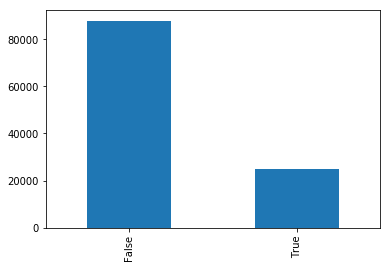

In [8]:
df.RainTomorrow.value_counts().plot(kind='bar')

###1.2.6 Plot Number of Days (RainTomorrow & No RainTomorrow) of Different Locations

In [9]:
import numpy as np
df1 = df.copy()
RainDays = df1.groupby('Location').RainTomorrow.sum()
TotalDays = df1.groupby('Location').RainTomorrow.count()
# print(RainDays)
# print(TotalDays)

location = np.array(TotalDays.index)
rain = np.array(RainDays)
total = np.array(TotalDays)
norain = total - rain

RainTotal = pd.concat([RainDays,TotalDays],axis=1)
RainTotal.columns = ['rain','total']
print(RainTotal)

                    rain  total
Location                       
Adelaide           625.0   2740
Albury             527.0   2440
AliceSprings       227.0   2744
BadgerysCreek      465.0   2334
Ballarat           745.0   2854
Bendigo            515.0   2713
Brisbane           662.0   3020
Cairns             910.0   2899
Canberra           503.0   2725
Cobar              359.0   2804
CoffsHarbour       748.0   2529
Dartmoor           770.0   2294
Darwin             817.0   3117
GoldCoast          733.0   2821
Hobart             739.0   3089
Katherine          102.0    670
Launceston         369.0   1538
Melbourne          521.0   2233
MelbourneAirport   638.0   2934
Mildura            315.0   2897
Moree              336.0   2629
MountGambier       876.0   2886
Nhil               236.0   1518
NorahHead          774.0   2785
NorfolkIsland      883.0   2864
Nuriootpa          550.0   2790
PearceRAAF         398.0   2458
Perth              618.0   3037
PerthAirport       556.0   2923
Portland

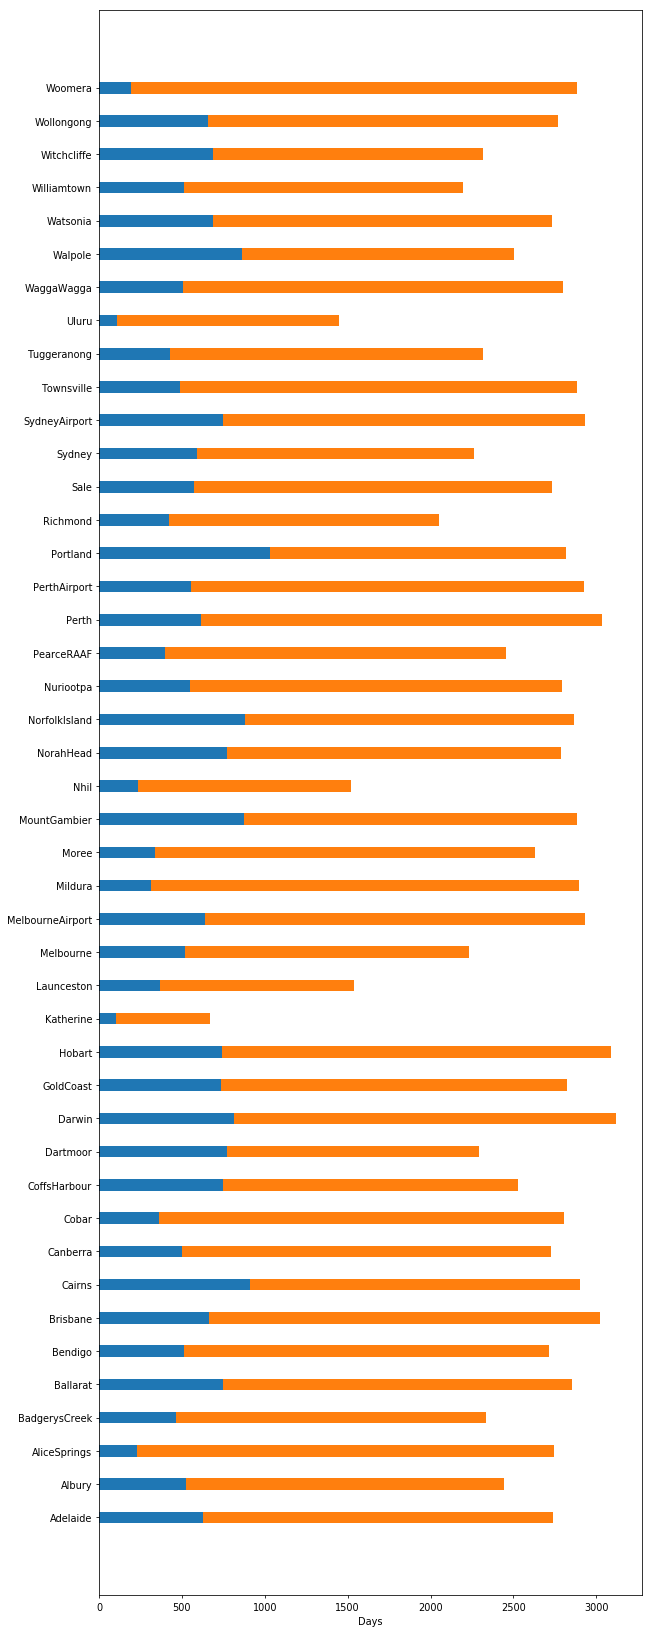

In [10]:
import matplotlib.pyplot as plt

width = 0.35
plt.figure(figsize=(10,30), dpi=70, facecolor='w', edgecolor='k')
p1 = plt.barh(location, rain, width)
p2 = plt.barh(location, norain, width, left = rain)
plt.xlabel('Days')
plt.show()

###1.2.7 Categorize Locations into 6 Groups based on Climatic Zones

In [11]:
Temperate = ['Albury','BadgerysCreek','Richmond','WaggaWagga','Williamtown','Ballarat','Sale','Melbourne','MelbourneAirport','Portland','Watsonia','Dartmoor','Adelaide','MountGambier','Nuriootpa','Witchcliffe','Walpole']
Grasslands = ['Cobar','Moree','Mildura','Nhil','AliceSprings']
Subtropical = ['CoffsHarbour','NorahHead','NorfolkIsland','Sydney','SydneyAirport','Wollongong','Brisbane','GoldCoast','PearceRAAF','Perth','PerthAirport']
Cooltemperate = ['Canberra','Tuggeranong','Bendigo','Hobart','Launceston']
Tropical = ['Cairns','Townsville','Darwin','Katherine']
Desert = ['Woomera','Uluru']

AllClimate = [Temperate,Grasslands,Subtropical,Cooltemperate,Tropical,Desert]

for i in range(len(AllClimate)):
    IsThisClimate = df.Location.isin(AllClimate[i])
    df.loc[IsThisClimate,'Location'] = i+1
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008/12/1,1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,False,False
1,2008/12/2,1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,False,False
2,2008/12/3,1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,False,False
3,2008/12/4,1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,False,False
4,2008/12/5,1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,False,False


###1.2.8 Categorize Time based on Season

In [12]:
AllMonth = pd.to_datetime(df.Date).dt.month

Winter = [12,1,2];
Spring = [3,4,5];
Summer = [6,7,8];
Fall = [9,10,11];
AllSeason = [Winter,Spring,Summer,Fall];

for i in range(len(AllSeason)):
    IsThisSeason = AllMonth.isin(AllSeason[i])
    df.loc[IsThisSeason,'Date'] = i
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142188,2,6,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,False,False
142189,2,6,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,False,False
142190,2,6,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,False,False
142191,2,6,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,False,False
142192,2,6,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,False,False


##1.3 Balanced Sampling

###1.3.1 Balanced Sampling

In [13]:
# Divide by class
df_class_0 = df[df.RainTomorrow == 0]
df_class_1 = df[df.RainTomorrow == 1]
print(df_class_0.shape)
print(df_class_1.shape)

(87906, 19)
(25019, 19)


In [14]:
df_class_0_under = df_class_0.sample(df_class_1.shape[0])
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print(df_class_0_under.shape)
print(df_test_under.shape)
df_test_under.head()

(25019, 19)
(50038, 19)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
47562,3,4,7.9,28.0,0.0,WNW,39.0,SW,NW,9.0,22.0,67.0,20.0,1012.4,1009.3,18.1,27.2,False,False
124946,1,1,14.3,20.6,0.0,ESE,46.0,ESE,ESE,19.0,22.0,70.0,62.0,1025.9,1024.8,17.4,19.0,False,False
61577,1,1,7.2,18.1,0.0,ESE,35.0,WNW,NE,13.0,15.0,85.0,75.0,1025.0,1023.3,12.7,16.8,False,False
75557,0,1,14.7,28.2,0.0,WNW,56.0,N,NNW,24.0,26.0,31.0,34.0,1004.9,1002.6,24.7,27.4,False,False
104025,0,6,22.6,35.5,0.0,E,39.0,E,N,30.0,17.0,27.0,17.0,1012.6,1011.0,26.7,33.5,False,False


###1.3.2 Dummify Sample Dataset

In [15]:
df2 = pd.get_dummies(df_test_under)
print(df2.columns)
print(df2.shape)
df2.head()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
      

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
47562,3,4,7.9,28.0,0.0,39.0,9.0,22.0,67.0,20.0,1012.4,1009.3,18.1,27.2,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
124946,1,1,14.3,20.6,0.0,46.0,19.0,22.0,70.0,62.0,1025.9,1024.8,17.4,19.0,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
61577,1,1,7.2,18.1,0.0,35.0,13.0,15.0,85.0,75.0,1025.0,1023.3,12.7,16.8,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75557,0,1,14.7,28.2,0.0,56.0,24.0,26.0,31.0,34.0,1004.9,1002.6,24.7,27.4,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
104025,0,6,22.6,35.5,0.0,39.0,30.0,17.0,27.0,17.0,1012.6,1011.0,26.7,33.5,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


###1.3.3 Split Training and Testing Dataset

In [0]:
y = df2.RainTomorrow.values

del df2['RainTomorrow']
X = df2.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##2. Apply Models

##2.1 Apply Machine Learning Models

Perceptron/
Logistic Regression/
Decision Tree/
Random Forest/
Neural Network/
Naive Bayes/
KNN

###2.1.1 Machine Learning Models with Pipeline

In [19]:
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import Perceptron, LogisticRegression
#from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

names = [
         "Perceptron",
         "LogisticRegression",
         #"Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         #"RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"
        ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(),
    #LinearSVC(C=1, dual=False),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    #SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
                 ]

# from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

AllPipe = []
AllScore = []
for name, clf in zip(names, classifiers):
    Pipe = Pipeline( [ ('scl', StandardScaler()),
                   #('pca', PCA(n_components = 5)),
                   ('clf', clf)])
    Pipe.fit(X_train, y_train)
    score = Pipe.score(X_test, y_test)
    AllPipe.append(Pipe)
    AllScore.append(score)

    y_pred = Pipe.predict(X_test)
    confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))
    print(confmat)

Algo: Perceptron           and Score: 0.7274
[[5207 2336]
 [1756 5713]]
Algo: LogisticRegression   and Score: 0.7870
[[6004 1539]
 [1658 5811]]
Algo: Decision Tree        and Score: 0.7637
[[5596 1947]
 [1600 5869]]
Algo: Random Forest        and Score: 0.7631
[[5889 1654]
 [1902 5567]]
Algo: Neural Net           and Score: 0.7981
[[6002 1541]
 [1490 5979]]
Algo: Naive Bayes          and Score: 0.6813
[[5234 2309]
 [2476 4993]]
Algo: Nearest Neighbors    and Score: 0.7080
[[5550 1993]
 [2390 5079]]


###2.1.2 10-fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score

FoldNum = 10
AllPipe_10FoldCV = []
AllScore_10FoldCV = []

for name, clf in zip(names, classifiers):
    # add pipeline to convert all data to StandardScale does it help?
    Pipe = Pipeline( [ ('scl', StandardScaler()),
                   #('pca', PCA(n_components = 5)),
                   ('clf', clf)])
    scores = cross_val_score(Pipe, X, y, cv=FoldNum)
    AllPipe_10FoldCV.append(Pipe)
    AllScore_10FoldCV.append(scores)
    
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, np.mean(scores)))
    
AllScore_10FoldCV = np.matrix(AllScore_10FoldCV)

Algo: Perceptron           and Score: 0.6961
Algo: LogisticRegression   and Score: 0.7691
Algo: Decision Tree        and Score: 0.7588
Algo: Random Forest        and Score: 0.7461
Algo: Neural Net           and Score: 0.7572
Algo: Naive Bayes          and Score: 0.6646
Algo: Nearest Neighbors    and Score: 0.6667


##2.2 PCA (2 Major Components)

Here we try to compare different classifier on our topics. We use 300 data for test and illustration. For the sake of simplicity, we adopt PCA in order to reduce the multiple dimension data to 2 dimension.

In [0]:
# Here we follow the standard process of PCA for data preparation for next step
sc = StandardScaler()
X_std = sc.fit_transform(X_train[:300])

cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))]
eigen_pairs.sort(key=(lambda li:li[0]),reverse=True)

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

X_pca = X_std.dot(W)

X_train_pca=X_pca[:200]
X_test_pca=X_pca[200:300]
y_train_pca=y_train[:200]
y_test_pca=y_train[200:300]


Here is a technical note: we transform complex number into float number for data visualization. We use this method since the imaginary part for all the data we use here is zero.

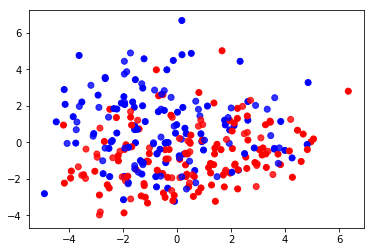

In [22]:
h=0.02
x_min, x_max = X_train_pca[:, 0].min() - .5, X_train_pca[:, 0].max() + .5
y_min, y_max = X_train_pca[:, 1].min() - .5, X_train_pca[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(float(x_min),float(x_max), h),
                         np.arange(float(y_min), float(y_max), h))
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca, cmap=cm_bright)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_pca, cmap=cm_bright, alpha=0.8)
plt.show()

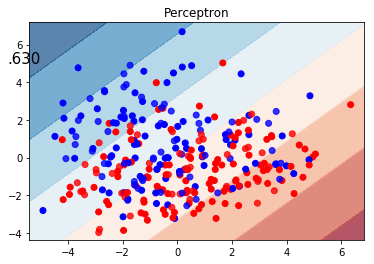

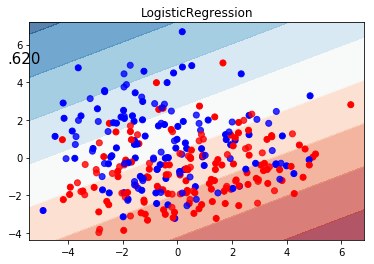

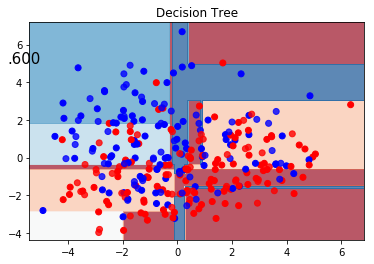

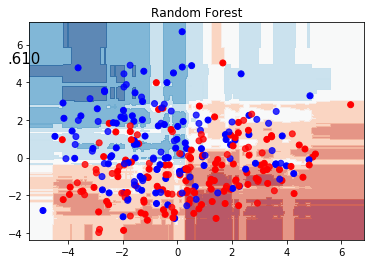

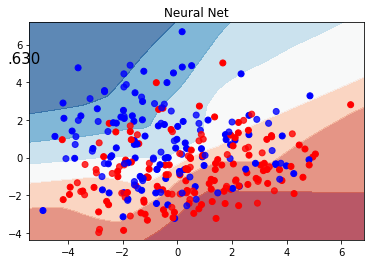

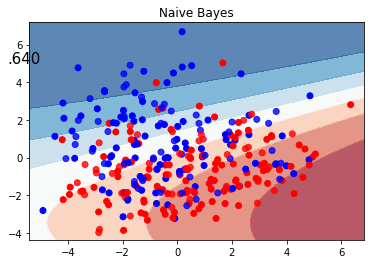

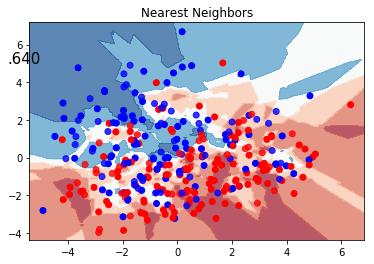

In [23]:
names = [
         "Perceptron",
         "LogisticRegression",
         #"Linear SVM", 
         "Decision Tree", 
         "Random Forest", 
         #"RBF SVM",          
         "Neural Net", 
         "Naive Bayes",  
         "Nearest Neighbors"
            ] 

classifiers = [ 
    Perceptron(),
    LogisticRegression(),
    #LinearSVC(C=1, dual=False),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    #SVC(kernel='rbf',gamma=2, C=1),
    MLPClassifier(hidden_layer_sizes=(100,50), alpha=1),
    GaussianNB(),
    KNeighborsClassifier(5)
                 ]
for name, clf in zip(names, classifiers):
    clf.fit(X_train_pca, y_train_pca)
    score = clf.score(X_test_pca, y_test_pca)
    if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.7)
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca, cmap=cm_bright)
    plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test_pca, cmap=cm_bright, alpha=0.8)
    plt.title(name)
    plt.text(-5.,5.,('%.3f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    plt.show()

We could easily see from the data: (1)PCA we used here could not represent our data very well (from the scatter plot without model contour);(2)It seems that Nearest Neighbors works the best, while the Perceptron and LogisticRegression do not work good.

## 2.3 Models with Bagging

###2.3.1 Models with Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier

P = Perceptron()
LR = LogisticRegression()
DT = DecisionTreeClassifier(max_depth=5)
RF = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)
MLP = MLPClassifier(hidden_layer_sizes=(100,50), alpha=1)
NB = GaussianNB()
KNN = KNeighborsClassifier(5)

Bag_num = 5
bag_P = BaggingClassifier(base_estimator = P,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_LR = BaggingClassifier(base_estimator = LR,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_DT = BaggingClassifier(base_estimator = DT,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_RF = BaggingClassifier(base_estimator = RF,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_MLP = BaggingClassifier(base_estimator = MLP,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_NB = BaggingClassifier(base_estimator = NB,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)
bag_KNN = BaggingClassifier(base_estimator = KNN,n_estimators=Bag_num,bootstrap=True,bootstrap_features=True,random_state=1)

bag_classifiers = [ 
    bag_P,
    bag_LR,
    bag_DT,
    bag_RF,
    bag_MLP,
    bag_NB,
    bag_KNN
                 ]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, 
                            random_state=0)
    
bag_names = [
    'bag_P',
    'bag_LR',
    'bag_DT',
    'bag_RF',
    'bag_MLP',
    'bag_NB',
    'bag_KNN'
            ] 
    
pipeResults = []
AllScores = []
for name, clf in zip(bag_names, bag_classifiers):
    pipe = Pipeline( [ ('scl', StandardScaler()),
#                   ('pca', PCA(n_components = 5)),
                   ('clf', clf)])
    pipe.fit(X_train, y_train)
    pipeResults.append(pipe)
    score = pipe.score(X_test, y_test)
    AllScores.append(score)
    #clf.fit(X_train, y_train)
    #score = clf.score(X_test, y_test)
    print("Algo: {0:<20s} and Score: {1:0.4f}".format(name, score))



Algo: bag_P                and Score: 0.7347
Algo: bag_LR               and Score: 0.7842
Algo: bag_DT               and Score: 0.7676
Algo: bag_RF               and Score: 0.7339
Algo: bag_MLP              and Score: 0.7998
Algo: bag_NB               and Score: 0.6708
Algo: bag_KNN              and Score: 0.7296


###2.3.2 Prediction Results and Confusion Matrix

In [0]:
#for name, clf in zip(bag_names, bag_classifiers):
#     pipe = Pipeline( [ ('scl', StandardScaler()),
#                    ('pca', PCA(n_components = 5)),
#                    ('clf', clf)])
#     pipe.fit(X_train, y_train)
predicts = []
for i in range(len(pipeResults)):    
    y_pred = pipeResults[i].predict(X_test)
    predicts.append(y_pred)
    confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
    print(confmat)

[[5680 1863]
 [2119 5350]]
[[5956 1587]
 [1653 5816]]
[[5914 1629]
 [1860 5609]]
[[5805 1738]
 [2257 5212]]
[[6015 1528]
 [1478 5991]]
[[4962 2581]
 [2361 5108]]
[[5670 1873]
 [2186 5283]]


Total number of predictions: 15012


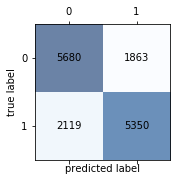

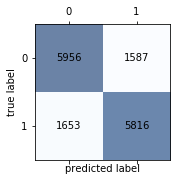

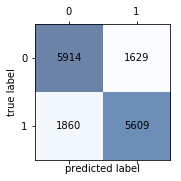

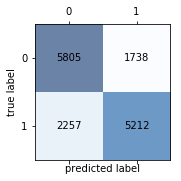

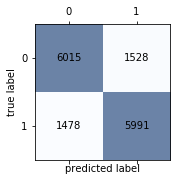

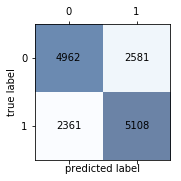

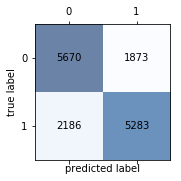

In [0]:
for k in range(len(predicts)):
    confmat = confusion_matrix(y_true = y_test, y_pred = predicts[k])
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.6)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, 
               s = confmat[i,j],
                va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
print('Total number of predictions:', len(y_pred))

###2.3.3 Prediction Results and ROC Curve

<Figure size 432x288 with 0 Axes>

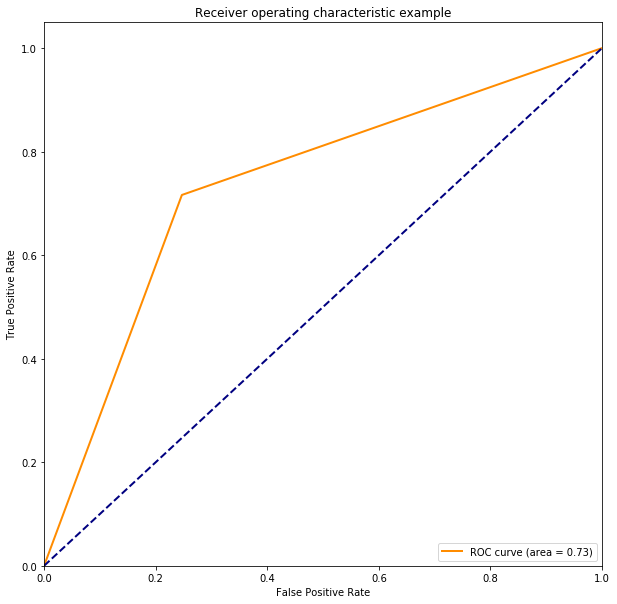

<Figure size 432x288 with 0 Axes>

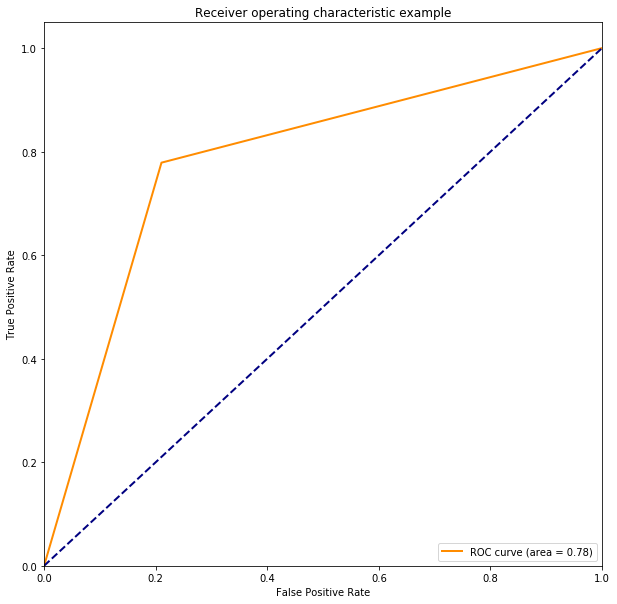

<Figure size 432x288 with 0 Axes>

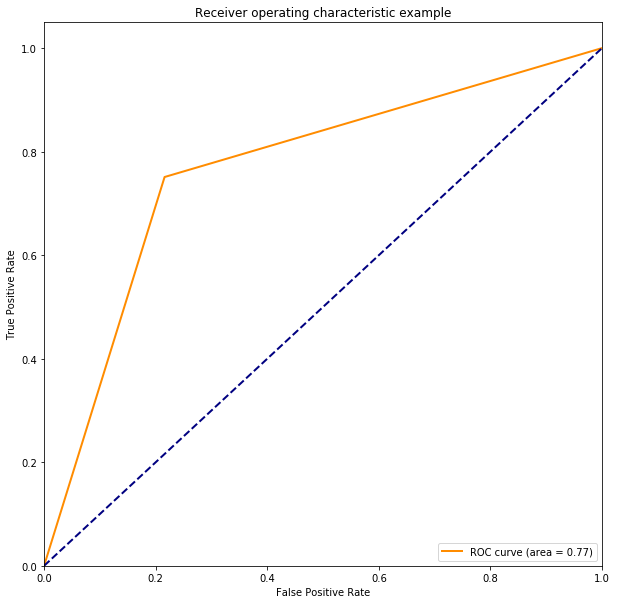

<Figure size 432x288 with 0 Axes>

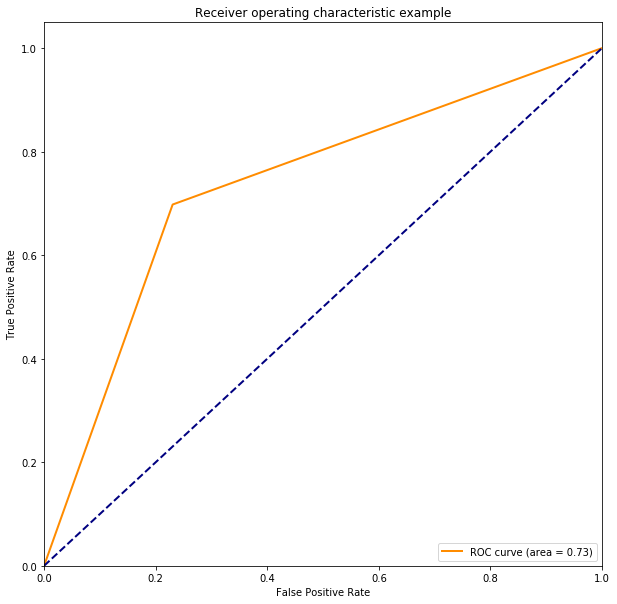

<Figure size 432x288 with 0 Axes>

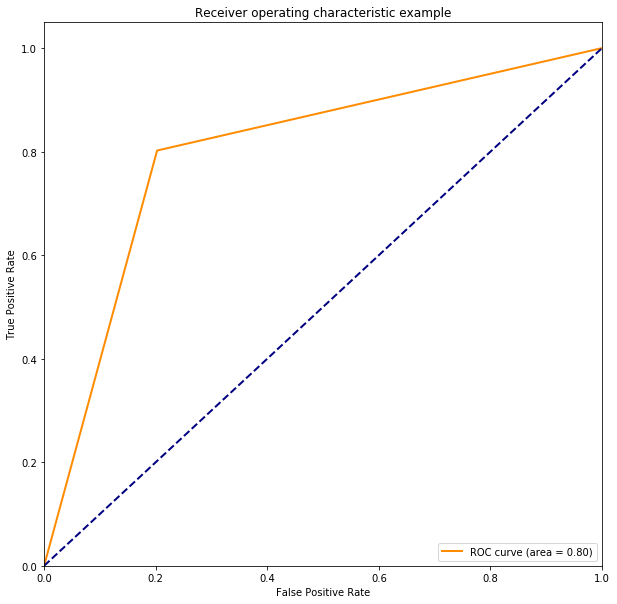

<Figure size 432x288 with 0 Axes>

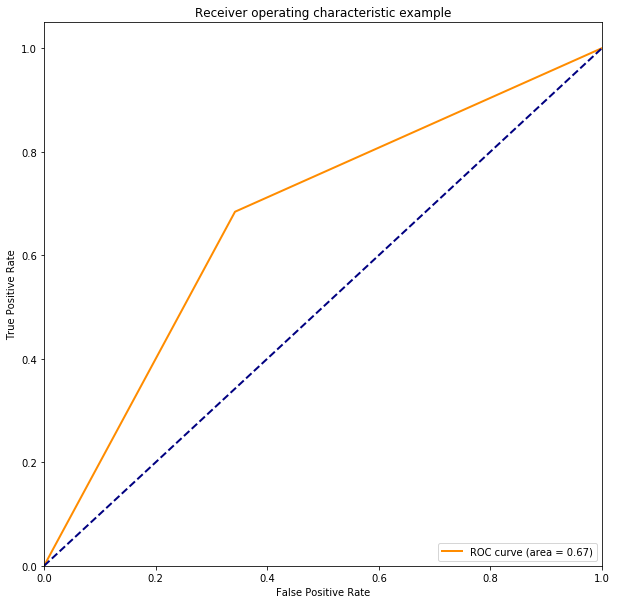

<Figure size 432x288 with 0 Axes>

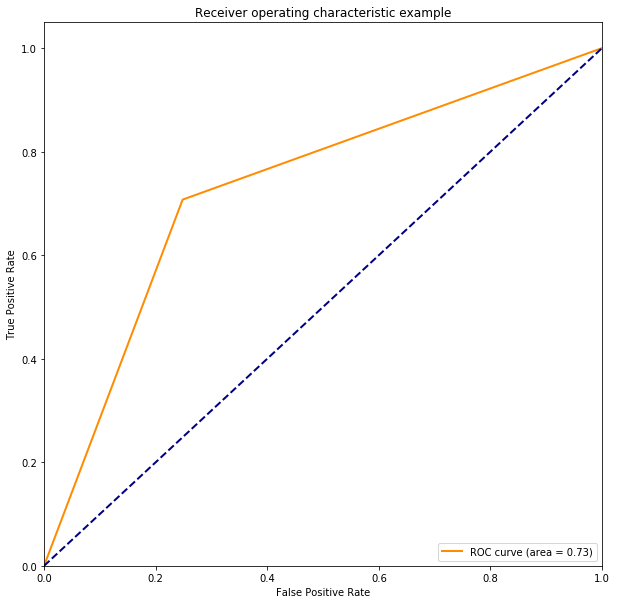

In [0]:
from sklearn.metrics import roc_curve, auc
# fig = plt.figure(figsize=(7,5))
# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)
# all_tpr= []

# for i, (train, test) in enumerate(cv):
#   probas = pipe_lr.fit(X_train2[train], 
#                        y_train[train]).predict_proba(X_train2[test])
#   fpr, tpr, thresholds = roc_curve(y_train[test], 
#                                   probas[:,1],
#                                   pos_label=1)
#   mean_tpr += interp(mean_fpr, fpr, tpr)
#   mean_tpr[0] = 0.0
#   roc_auc = auc(fpr, tpr)
#   plt.plot(fpr, tpr, 
#           label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
  

# plt.plot([0,1],[0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guess')

# mean_tpr /= len(cv)
# mean_tpr[-1] = 1.0

# mean_auc = auc(mean_fpr, mean_tpr)

# plt.plot(mean_fpr, mean_tpr, 'k--',
#         label = 'mean ROC (area = %0.2f)' % mean_auc, lw=2)

# plt.plot([0,0,1], [0,1,1], linestyle=':', color='black', label='perfect performance')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.legend(loc='lower right')
# plt.show()

for i in range(len(predicts)):
    fpr, tpr, thresholds  =  roc_curve(y_test, predicts[i])
    roc_auc =auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###x-axis:false positve rate，y-axis:true positive rate
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()